OWID CO₂ Dataset – Exploratory Data Analysis
-1 What the data looks like  
-2 Missing values  
-3 Data types  
-4 Basic statistics  
-5 Outliers  
-6 Trends

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
sns.set(style="whitegrid")

In [2]:
#Load the Data
df = pd.read_csv("../data/cleaned/wgi_countries.csv")
df.head()

,codeindyr,code,country,year,indicator,estimate,stddev,nsource,pctrank,pctranklower,pctrankupper,adb,afr,asd,bps,bti,ccr,ebr,eiu,eqi,frh,gcb,gcs,gii,gwp,her,hum,hrm,ifd,ijt,ipd,irp,lbo,msi,obi,pia,prc,prs,rsf,tpr,vab,vdm,wbs,wcy,wjp,wmo,scalemean,scalesd,country_iso
0,AFGcc1996,AFG,Afghanistan,1996,cc,-1.291704773902893,0.34050697088241577,2,4.301075458526611,0,27.419355392456055,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,0.2950838125720781,..,..,..,0,0.013374,0.93648,AFG
1,ALBcc1996,ALB,Albania,1996,cc,-0.8939034938812256,0.3159140348434448,3,19.354839324951172,2.6881721019744873,43.0107536315918,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,0.3333333333333333,..,..,..,0.315589909591906,..,..,..,0.25,0.013374,0.93648,ALB
2,DZAcc1996,DZA,Algeria,1996,cc,-0.5667409300804138,0.26207658648490906,4,33.33333206176758,16.66666603088379,52.68817138671875,..,..,..,..,..,..,..,0.25,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,0.5,..,..,..,0.36883168576648,..,..,..,0.25,0.013374,0.93648,DZA
3,ASMcc1996,ASM,American Samoa,1996,cc,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,0.013374,0.93648,ASM
4,ADOcc1996,ADO,Andorra,1996,cc,1.3181432485580444,0.480888694524765,1,87.09677124023438,72.04301452636719,96.7741928100586,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,0.875,0.013374,0.93648,AND


In [3]:
#Dataset Shape
df.shape

(28350, 49)

Historical data with 28350 rows and 49 columns.
Each row represents country-year-indicator observation meaning governance observation for a specific country, year, and governance indicator, along with associated statistics and source information.
Each column the country, year, indicator, score, uncertainty, percentile ranking, and sometimes source info.

In [4]:
#Dataset Information (Data Types + Missing)/ Data Quality
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28350 entries, 0 to 28349
Data columns (total 49 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   codeindyr     28350 non-null  object 
 1   code          28350 non-null  object 
 2   country       28350 non-null  object 
 3   year          28350 non-null  int64  
 4   indicator     28350 non-null  object 
 5   estimate      28350 non-null  object 
 6   stddev        28350 non-null  object 
 7   nsource       28350 non-null  object 
 8   pctrank       28350 non-null  object 
 9   pctranklower  28350 non-null  object 
 10  pctrankupper  28350 non-null  object 
 11  adb           28350 non-null  object 
 12  afr           28350 non-null  object 
 13  asd           28350 non-null  object 
 14  bps           28350 non-null  object 
 15  bti           28350 non-null  object 
 16  ccr           28350 non-null  object 
 17  ebr           28350 non-null  object 
 18  eiu           28350 non-nu

In [5]:
#Basic Statistics Summary
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(df.describe().T.to_string(float_format="{:,.0f}".format))
#saving the statistics in csv for easy readability/understanding used --f"{int(x):,}" adds commas for readability.
# --.applymap() applies formatting to all values in the DataFrame.
stats = df.describe().T
stats_formatted = stats.applymap(lambda x: f"{int(x):,}")
stats_formatted.to_csv("../data/raw/owid_statistics.csv")

           count  mean  std   min   25%   50%   75%   max
year      28,350 2,011    8 1,996 2,005 2,011 2,017 2,023
scalemean 28,350     0    0    -0    -0     0     0     0
scalesd   28,350     1    0     1     1     1     1     1


C:\Users\Code Lou\AppData\Local\Temp\ipykernel_27596\4087492685.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  stats_formatted = stats.applymap(lambda x: f"{int(x):,}")


The majority of columns are currently of object type, which limits the usefulness of descriptive statistics. It is better to convert numeric columns to float64 or int64 for proper analysis.

In [7]:
#Convert Numeric Columns to float64/int64
import pandas as pd

# Assuming your DataFrame is named df
numeric_cols = [
    'estimate', 'stddev', 'nsource', 'pctrank', 
    'pctranklower', 'pctrankupper'
]

# Convert columns to numeric (float). Errors='coerce' will set invalid parsing as NaN
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verify the conversion
df[numeric_cols].dtypes
#Basic Statistics Summary
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(df.describe().T.to_string(float_format="{:,.0f}".format))
#saving the statistics in csv for easy readability/understanding used --f"{int(x):,}" adds commas for readability.
# --.applymap() applies formatting to all values in the DataFrame.
stats = df.describe().T
stats_formatted = stats.applymap(lambda x: f"{int(x):,}")
stats_formatted.to_csv("../data/raw/owid_statistics.csv")


              count  mean  std   min   25%   50%   75%   max
year         28,350 2,011    8 1,996 2,005 2,011 2,017 2,023
estimate     27,525     0    1    -3    -1    -0     1     2
stddev       27,525     0    0     0     0     0     0     1
nsource      27,525     8    4     1     5     8    10    20
pctrank      27,525    50   29     0    26    50    75   100
pctranklower 27,525    39   28     0    15    36    62   100
pctrankupper 27,525    60   28     0    38    60    87   100
scalemean    28,350     0    0    -0    -0     0     0     0
scalesd      28,350     1    0     1     1     1     1     1


C:\Users\Code Lou\AppData\Local\Temp\ipykernel_27596\221784998.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  stats_formatted = stats.applymap(lambda x: f"{int(x):,}")


1.Most numeric columns are properly structured after conversion.
2.Missing values exist for estimate, stddev, nsource, and percentile columns (~825 rows).
3.scalemean and scalesd are normalized constants (0 and 1 respectively).
4.Percentile columns (pctrank, pctranklower, pctrankupper) provide meaningful governance ranking information across countries.

In [ ]:
#Missing Values
df.isna().sum()
missing_count = df.isna().sum()
missing_percent = (df.isna().mean() * 100).round(2)

# Combine Series into one DataFrame side by side
missing_info = pd.concat([missing_count, missing_percent], axis=1)
missing_info.columns = ['Missing_Count', 'Missing_Percent']
print(missing_info)

Most of the dataset is complete and clean. The key columns like `country`, `year`, `indicator`, and `country_iso` have no missing data at all.  

A few important columns have a small number of missing values—about 3% of the data:  
- `estimate` (the main governance score)  
- `stddev` (uncertainty of the estimate)  
- `nsource` (number of sources used)  
- `pctrank`, `pctranklower`, `pctrankupper` (percentile rankings)  

In [11]:
# Check for Duplicate Rows
df.duplicated().sum()

np.int64(0)

In [12]:
#Numeric and Categorical Columns
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns
#numeric_cols, categorical_cols
print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)
print("Number of numeric columns:", len(numeric_cols))
print("Number of categorical columns:", len(categorical_cols))

Numeric columns: Index(['year', 'estimate', 'stddev', 'nsource', 'pctrank', 'pctranklower',
       'pctrankupper', 'scalemean', 'scalesd'],
      dtype='object')
Categorical columns: Index(['codeindyr', 'code', 'country', 'indicator', 'adb', 'afr', 'asd', 'bps',
       'bti', 'ccr', 'ebr', 'eiu', 'eqi', 'frh', 'gcb', 'gcs', 'gii', 'gwp',
       'her', 'hum', 'hrm', 'ifd', 'ijt', 'ipd', 'irp', 'lbo', 'msi', 'obi',
       'pia', 'prc', 'prs', 'rsf', 'tpr', 'vab', 'vdm', 'wbs', 'wcy', 'wjp',
       'wmo', 'country_iso'],
      dtype='object')
Number of numeric columns: 9
Number of categorical columns: 40


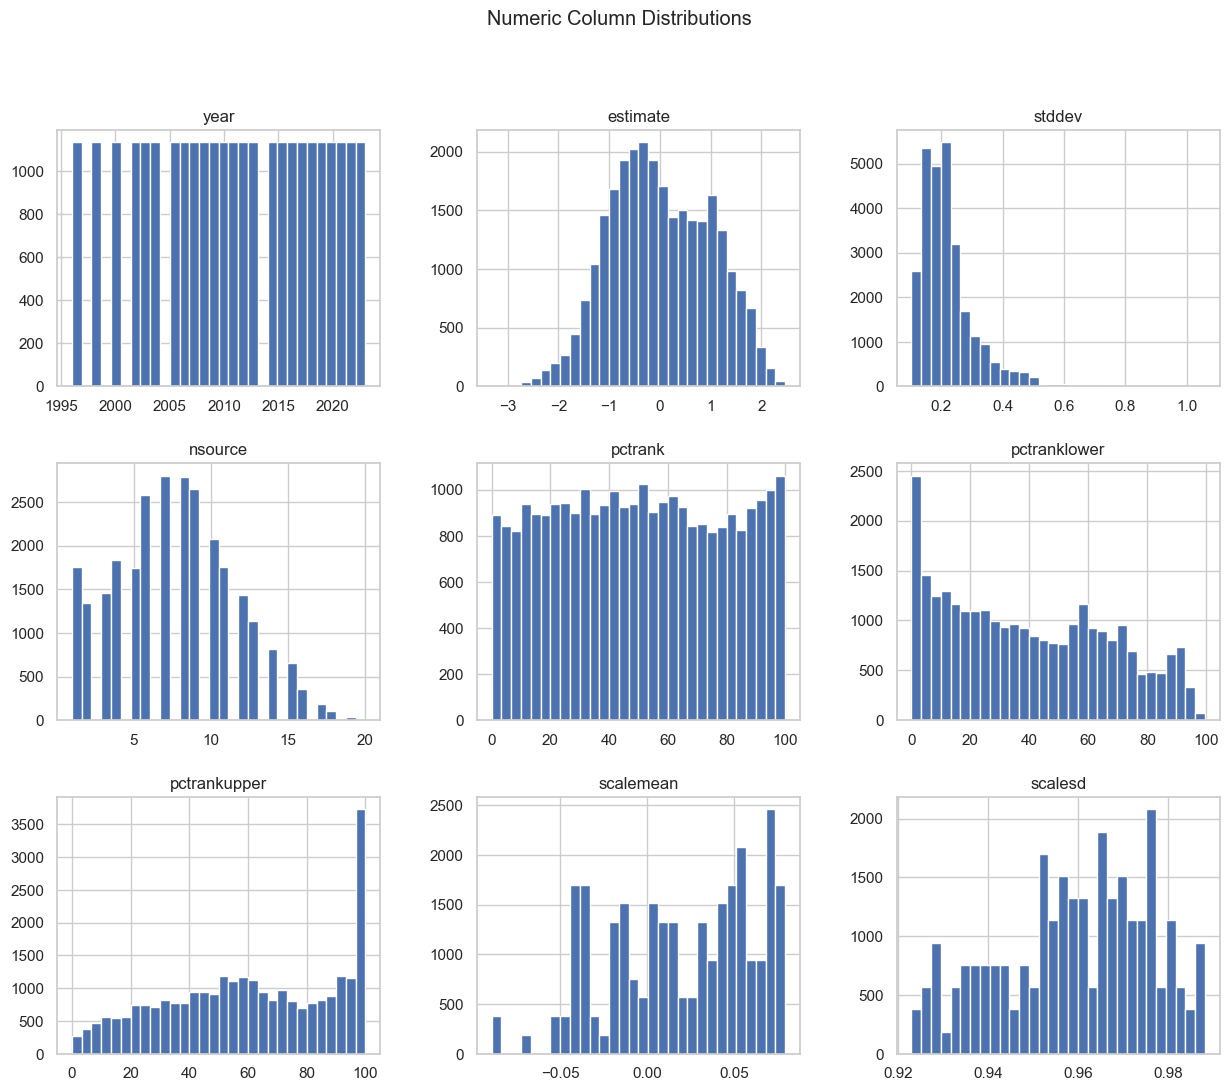

In [13]:
#Numeric Distributions
df[numeric_cols].hist(figsize=(15,12), bins=30)
plt.suptitle("Numeric Column Distributions")
plt.show()

<Figure size 1500x1000 with 0 Axes>

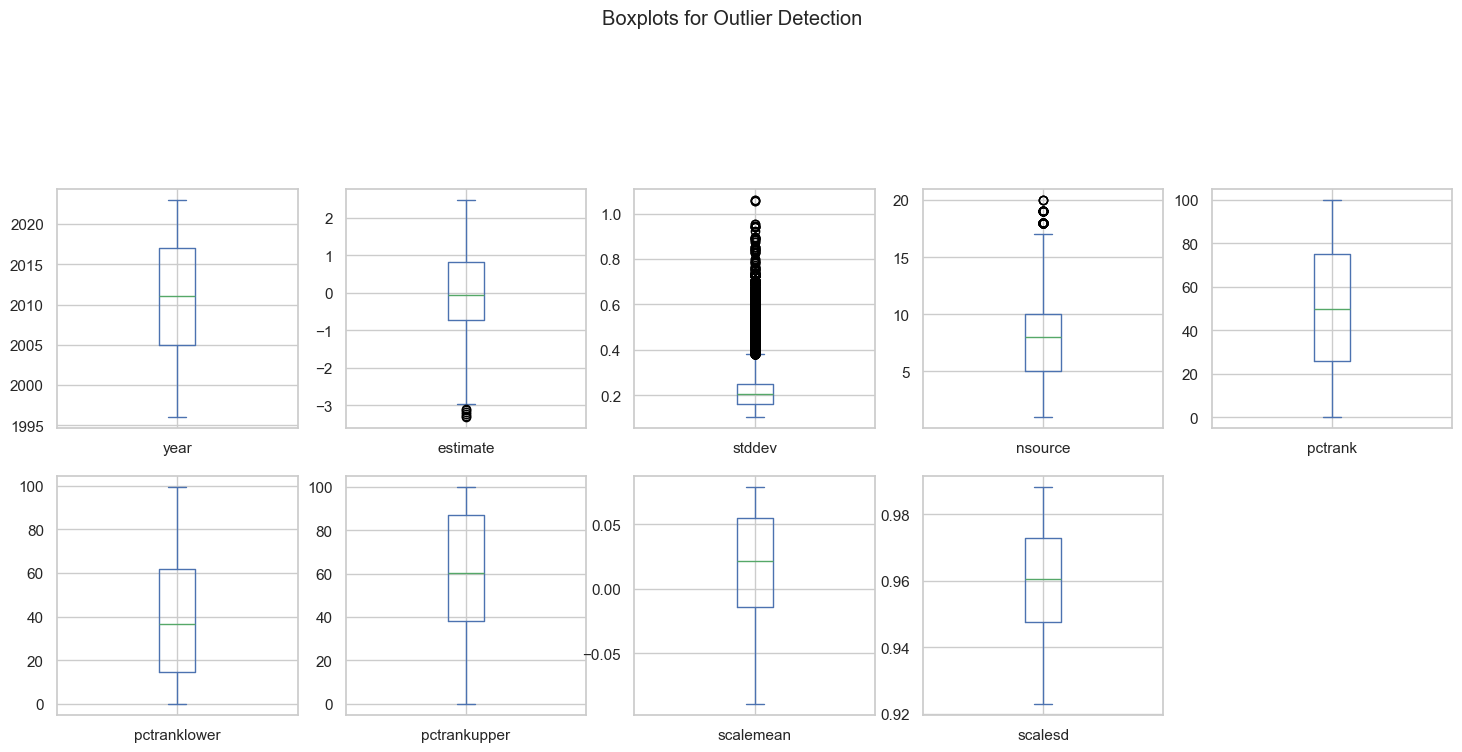

In [14]:
# Boxplots to Detect Outliers
plt.figure(figsize=(15,10))
df[numeric_cols].plot(kind='box', subplots=True, layout=(5,5), figsize=(18,18))
plt.suptitle("Boxplots for Outlier Detection")
plt.show()

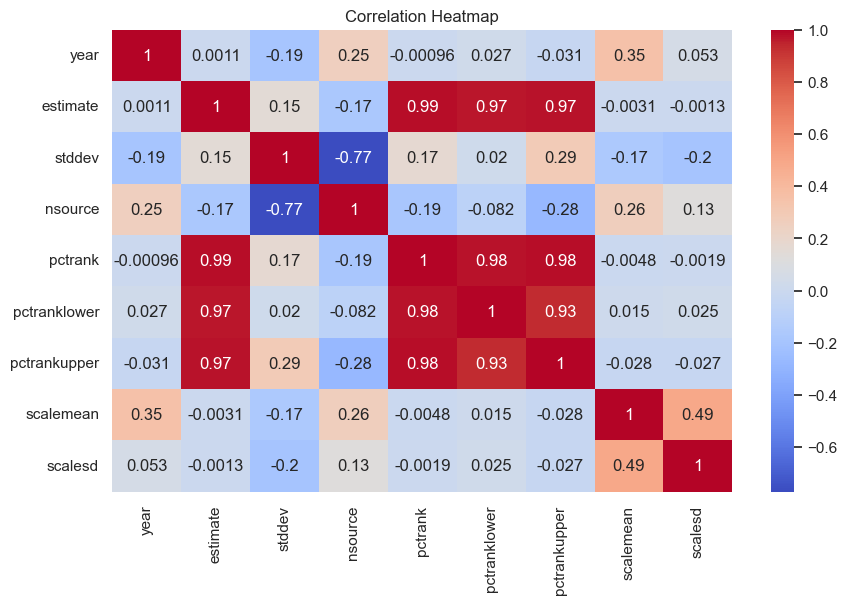

In [21]:
#Correlation Between Numeric Columns
# corr = df.corr(numeric_only=True)

# plt.figure(figsize=(14,10))
# sns.heatmap(corr, cmap="coolwarm", linewidths=0.5)
# plt.title("Correlation Heatmap")
# plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

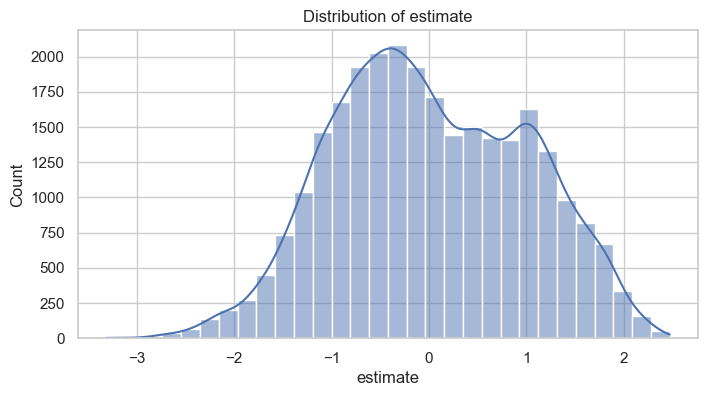

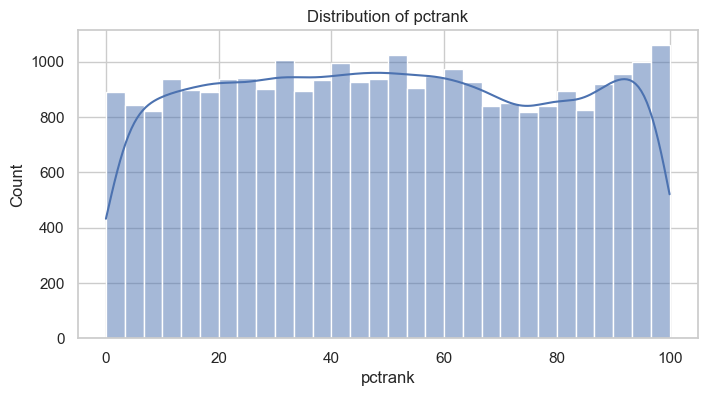

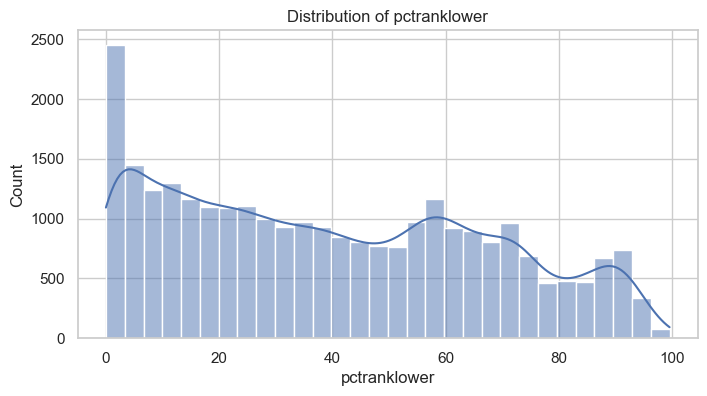

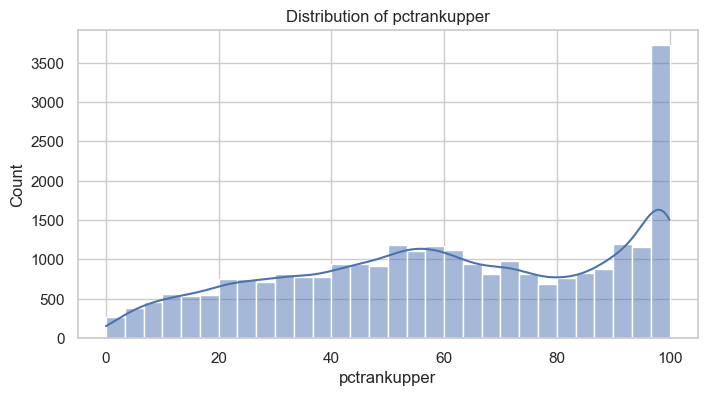

In [16]:
#Distribution Plots
for col in ['estimate', 'pctrank', 'pctranklower', 'pctrankupper']:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

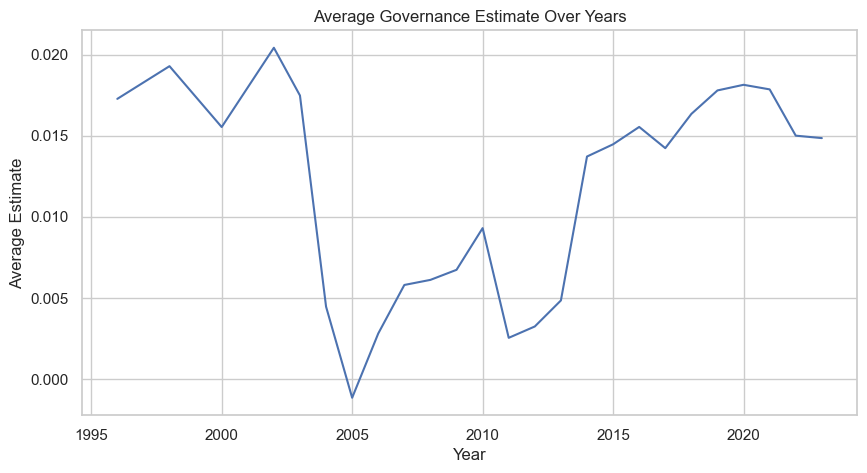

In [17]:
#Trends Over Time ---
plt.figure(figsize=(10,5))
df.groupby('year')['estimate'].mean().plot()
plt.title('Average Governance Estimate Over Years')
plt.xlabel('Year')
plt.ylabel('Average Estimate')
plt.show()

In [18]:
#Country-level Analysis
top_countries = df.groupby('country')['estimate'].mean().sort_values(ascending=False).head(10)
print("Top 10 Countries by Average Governance Estimate:\n", top_countries)

Top 10 Countries by Average Governance Estimate:
 country
Finland        1.812345
Denmark        1.766541
New Zealand    1.757593
Switzerland    1.726560
Norway         1.713761
Sweden         1.699327
Luxembourg     1.692521
Netherlands    1.660014
Canada         1.585043
Iceland        1.579636
Name: estimate, dtype: float64
